In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from collections import Counter
import matplotlib.pyplot as plt
train=pd.read_csv('./desktop/all/train.csv')#读入训练数据集
test=pd.read_csv('./desktop/all/test.csv')#读入测试数据集
print('训练数据集规模',train.shape)
print('测试数据集规模',test.shape)

训练数据集规模 (891, 12)
测试数据集规模 (418, 11)


In [2]:
df=train.append(test,sort=True) #合并数据集，方便进行数据预处理

In [3]:
print('合并后的数据集规模',df.shape)

合并后的数据集规模 (1309, 12)


In [4]:
pd.options.display.float_format='{:,.3f}'.format #数据显示模式
df.describe()#查看数据的基本统计信息

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,"1,046.000","1,308.000","1,309.000","1,309.000","1,309.000","1,309.000",891.000
mean,29.881,33.295,0.385,655.000,2.295,0.499,0.384
std,14.413,51.759,0.866,378.020,0.838,1.042,0.487
min,0.170,0.000,0.000,1.000,1.000,0.000,0.000
25%,21.000,7.896,0.000,328.000,2.000,0.000,0.000
50%,28.000,14.454,0.000,655.000,3.000,0.000,0.000
75%,39.000,31.275,0.000,982.000,3.000,1.000,1.000
max,80.000,512.329,9.000,"1,309.000",3.000,8.000,1.000


In [5]:
df.info()#查看每一列的数据以及数据类型，进行缺失值分析

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.000,NaN,S,7.250,"Braund, Mr. Owen Harris",0,1,3,male,1,0.000,A/5 21171
1,38.000,C85,C,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.000,PC 17599
2,26.000,NaN,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1.000,STON/O2. 3101282
3,35.000,C123,S,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.000,113803
4,35.000,NaN,S,8.050,"Allen, Mr. William Henry",0,5,3,male,0,0.000,373450
5,nan,NaN,Q,8.458,"Moran, Mr. James",0,6,3,male,0,0.000,330877
6,54.000,E46,S,51.862,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.000,17463
7,2.000,NaN,S,21.075,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.000,349909
8,27.000,NaN,S,11.133,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.000,347742
9,14.000,NaN,C,30.071,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.000,237736


In [7]:
df['Age']=df['Age'].fillna(df['Age'].mean())#年龄缺失值用均值填充

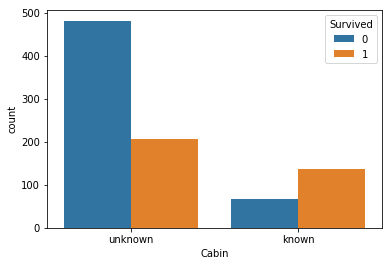

In [8]:
train['Cabin']=train['Cabin'].map(lambda x:'known' if type(x)==str else 'unknown')
sns.countplot(x='Cabin',hue="Survived",data=train)

In [9]:
df['Cabin']=df['Cabin'].fillna('U')#Cbain缺失值用‘U’填充，代表Unknown
df['Fare']=df['Fare'].fillna(df['Fare'].mean())#Fare缺失值用均值填充
print(Counter(df['Embarked']))#Embarked的类别有三类：S、C、Q，众数‘S'

Counter({'S': 914, 'C': 270, 'Q': 123, nan: 2})


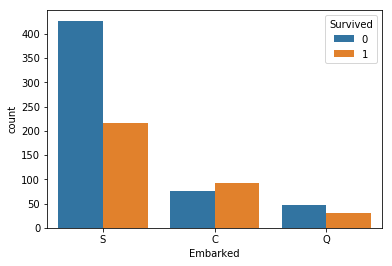

In [10]:
sns.countplot(x='Embarked',hue="Survived",data=train)

In [11]:
df['Embarked']=df['Embarked'].fillna('S')#Embarked缺失值用众数'S'填充

In [12]:
#查看缺失值处理之后的数据
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


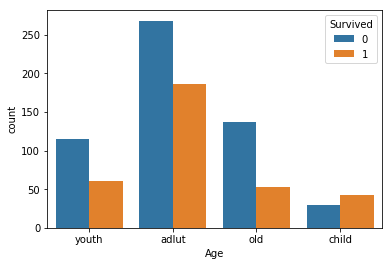

In [13]:
#年龄特征分类
train['Age']=train['Age'].map(lambda x: 'child' if x<14 else 'youth' if x<24 else 'adlut' if x<64 else 'old' )
sns.countplot(x='Age',hue="Survived",data=train)

In [14]:
AgeDf=pd.DataFrame()
AgeDf['child']=df['Age'].map(lambda x:1 if x<=14 else 0)
AgeDf['youth']=df['Age'].map(lambda x:1 if 14<x<=24 else 0)
AgeDf['adult']=df['Age'].map(lambda x:1 if 24<x<=64 else 0)
AgeDf['old']=df['Age'].map(lambda x:1 if x>64 else 0)
AgeDf.head()

,child,youth,adult,old
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [15]:
df=pd.concat([df,AgeDf],axis=1)#将one-hot产生的虚拟变量加入到数据集中
df.drop('Age',axis=1,inplace=True)#删除原来的Age属性
df.head(5)

,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,child,youth,adult,old
0,U,S,7.250,"Braund, Mr. Owen Harris",0,1,3,male,1,0.000,A/5 21171,0,1,0,0
1,C85,C,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.000,PC 17599,0,0,1,0
2,U,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1.000,STON/O2. 3101282,0,0,1,0
3,C123,S,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.000,113803,0,0,1,0
4,U,S,8.050,"Allen, Mr. William Henry",0,5,3,male,0,0.000,373450,0,0,1,0


In [16]:
cabinDf=pd.DataFrame()#创建pandas中的DataFrame对象
df['Cabin']=df['Cabin'].map(lambda x:x[0])
cabinDf=pd.get_dummies(df['Cabin'],prefix='Cabin')#使用get_dummies进行oone-hot编码，列名前缀是Cabin
cabinDf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [17]:
df=pd.concat([df,cabinDf],axis=1)#将one-hot产生的虚拟变量加入到数据集中
df.drop('Cabin',axis=1,inplace=True)#删除原来的Cabin属性
df.head(5)

,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,...,old,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,S,7.250,"Braund, Mr. Owen Harris",0,1,3,male,1,0.000,A/5 21171,...,0,0,0,0,0,0,0,0,0,1
1,C,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.000,PC 17599,...,0,0,0,1,0,0,0,0,0,0
2,S,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1.000,STON/O2. 3101282,...,0,0,0,0,0,0,0,0,0,1
3,S,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.000,113803,...,0,0,0,1,0,0,0,0,0,0
4,S,8.050,"Allen, Mr. William Henry",0,5,3,male,0,0.000,373450,...,0,0,0,0,0,0,0,0,0,1


In [18]:
EmbarkedDf=pd.DataFrame()#创建pandas中的DataFrame对象
df['Embarked']=df['Embarked'].map(lambda x:x[0])
EmbarkedDf=pd.get_dummies(df['Embarked'],prefix='Embarked')#使用get_dummies进行oone-hot编码，列名前缀是Embarked
EmbarkedDf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [19]:
df=pd.concat([df,EmbarkedDf],axis=1)#将one-hot产生的虚拟变量加入到数据集中
df.drop('Embarked',axis=1,inplace=True)#删除原来的Embarked属性
df.head(5)

,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,child,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,7.250,"Braund, Mr. Owen Harris",0,1,3,male,1,0.000,A/5 21171,0,...,0,0,0,0,0,0,1,0,0,1
1,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.000,PC 17599,0,...,1,0,0,0,0,0,0,1,0,0
2,7.925,"Heikkinen, Miss. Laina",0,3,3,female,0,1.000,STON/O2. 3101282,0,...,0,0,0,0,0,0,1,0,0,1
3,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.000,113803,0,...,1,0,0,0,0,0,0,0,0,1
4,8.050,"Allen, Mr. William Henry",0,5,3,male,0,0.000,373450,0,...,0,0,0,0,0,0,1,0,0,1


In [20]:
PclassDf=pd.DataFrame()#创建pandas中的DataFrame对象
PclassDf=pd.get_dummies(df['Pclass'],prefix='Pclass')#使用get_dummies进行oone-hot编码，列名前缀是Pclass
PclassDf.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [21]:
df=pd.concat([df,PclassDf],axis=1)#将one-hot产生的虚拟变量加入到数据集中
df.drop('Pclass',axis=1,inplace=True)#删除原来的Pclass属性
df.head(5)

,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,child,youth,...,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,7.250,"Braund, Mr. Owen Harris",0,1,male,1,0.000,A/5 21171,0,1,...,0,0,0,1,0,0,1,0,0,1
1,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,female,1,1.000,PC 17599,0,0,...,0,0,0,0,1,0,0,1,0,0
2,7.925,"Heikkinen, Miss. Laina",0,3,female,0,1.000,STON/O2. 3101282,0,0,...,0,0,0,1,0,0,1,0,0,1
3,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,female,1,1.000,113803,0,0,...,0,0,0,0,0,0,1,1,0,0
4,8.050,"Allen, Mr. William Henry",0,5,male,0,0.000,373450,0,0,...,0,0,0,1,0,0,1,0,0,1


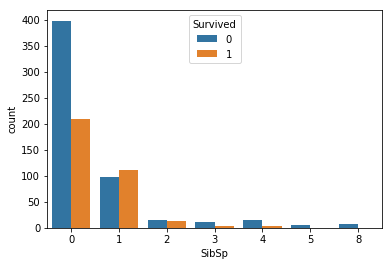

In [22]:
sns.countplot(x="SibSp", hue="Survived", data=train)

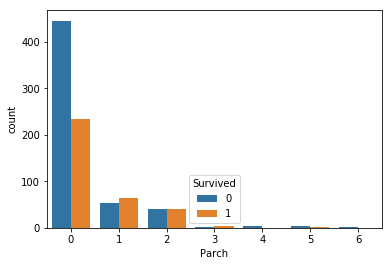

In [23]:
sns.countplot(x="Parch", hue="Survived", data=train)

In [24]:
ParchDf=pd.DataFrame()
ParchDf['Parch_none']=df['Parch'].map(lambda x:1 if x==0 else 0)
ParchDf['Parch_less']=df['Parch'].map(lambda x:1 if 1<=x<=4 else 0)
ParchDf['Parch_many']=df['Parch'].map(lambda x:1 if x>4 else 0)
ParchDf.head()

,Parch_none,Parch_less,Parch_many
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
df=pd.concat([df,ParchDf],axis=1)#将one-hot产生的虚拟变量加入到数据集中
df.drop('Parch',axis=1,inplace=True)#删除原来的Parch属性
df.head(5)

,Fare,Name,PassengerId,Sex,SibSp,Survived,Ticket,child,youth,adult,...,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Parch_none,Parch_less,Parch_many
0,7.250,"Braund, Mr. Owen Harris",1,male,1,0.000,A/5 21171,0,1,0,...,1,0,0,1,0,0,1,1,0,0
1,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,female,1,1.000,PC 17599,0,0,1,...,0,1,0,0,1,0,0,1,0,0
2,7.925,"Heikkinen, Miss. Laina",3,female,0,1.000,STON/O2. 3101282,0,0,1,...,1,0,0,1,0,0,1,1,0,0
3,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,female,1,1.000,113803,0,0,1,...,0,0,0,1,1,0,0,1,0,0
4,8.050,"Allen, Mr. William Henry",5,male,0,0.000,373450,0,0,1,...,1,0,0,1,0,0,1,1,0,0


In [26]:
SibSpDf=pd.DataFrame()
SibSpDf['SibSp_none']=df['SibSp'].map(lambda x:1 if x==0 else 0)
SibSpDf['SibSp_less']=df['SibSp'].map(lambda x:1 if 1<=x<=4 else 0)
SibSpDf['SibSp_many']=df['SibSp'].map(lambda x:1 if x>4 else 0)
SibSpDf.head()

,SibSp_none,SibSp_less,SibSp_many
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [27]:
df=pd.concat([df,SibSpDf],axis=1)#将one-hot产生的虚拟变量加入到数据集中
df.drop('SibSp',axis=1,inplace=True)#删除原来的属性
df.head(5)

,Fare,Name,PassengerId,Sex,Survived,Ticket,child,youth,adult,old,...,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Parch_none,Parch_less,Parch_many,SibSp_none,SibSp_less,SibSp_many
0,7.250,"Braund, Mr. Owen Harris",1,male,0.000,A/5 21171,0,1,0,0,...,1,0,0,1,1,0,0,0,1,0
1,71.283,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,female,1.000,PC 17599,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,7.925,"Heikkinen, Miss. Laina",3,female,1.000,STON/O2. 3101282,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
3,53.100,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,female,1.000,113803,0,0,1,0,...,1,1,0,0,1,0,0,0,1,0
4,8.050,"Allen, Mr. William Henry",5,male,0.000,373450,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [28]:
#sns.countplot(x="Fare", hue="Survived", data=train)

In [29]:
FareDf=pd.DataFrame()
FareDf['Fare_low']=df['Fare'].map(lambda x:1 if x<=2.5 else 0)
FareDf['Fare_high']=df['Fare'].map(lambda x:1 if x>2.5 else 0)
FareDf.head()

,Fare_low,Fare_high
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
df=pd.concat([df,FareDf],axis=1)#将one-hot产生的虚拟变量加入到数据集中
df.drop('Fare',axis=1,inplace=True)#删除原来的属性
df.head(5)

,Name,PassengerId,Sex,Survived,Ticket,child,youth,adult,old,Cabin_A,...,Pclass_2,Pclass_3,Parch_none,Parch_less,Parch_many,SibSp_none,SibSp_less,SibSp_many,Fare_low,Fare_high
0,"Braund, Mr. Owen Harris",1,male,0.000,A/5 21171,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,female,1.000,PC 17599,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
2,"Heikkinen, Miss. Laina",3,female,1.000,STON/O2. 3101282,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,female,1.000,113803,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,"Allen, Mr. William Henry",5,male,0.000,373450,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1


In [31]:
sex_mapDict={"male":1,"female":0}
df.Sex=df.Sex.map(sex_mapDict)
df.head()

,Name,PassengerId,Sex,Survived,Ticket,child,youth,adult,old,Cabin_A,...,Pclass_2,Pclass_3,Parch_none,Parch_less,Parch_many,SibSp_none,SibSp_less,SibSp_many,Fare_low,Fare_high
0,"Braund, Mr. Owen Harris",1,1,0.000,A/5 21171,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,0,1.000,PC 17599,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
2,"Heikkinen, Miss. Laina",3,0,1.000,STON/O2. 3101282,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,0,1.000,113803,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,"Allen, Mr. William Henry",5,1,0.000,373450,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1


In [32]:
#df=df.drop('Name',axis=1)
#df=df.drop('PassengerId',axis=1)
#df=df.drop('Ticket',axis=1)
df.head()

,Name,PassengerId,Sex,Survived,Ticket,child,youth,adult,old,Cabin_A,...,Pclass_2,Pclass_3,Parch_none,Parch_less,Parch_many,SibSp_none,SibSp_less,SibSp_many,Fare_low,Fare_high
0,"Braund, Mr. Owen Harris",1,1,0.000,A/5 21171,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,0,1.000,PC 17599,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
2,"Heikkinen, Miss. Laina",3,0,1.000,STON/O2. 3101282,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,0,1.000,113803,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,"Allen, Mr. William Henry",5,1,0.000,373450,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1


In [33]:
train.shape

(891, 12)

In [34]:
df_X=pd.concat([PclassDf,
               ParchDf,
               SibSpDf,
               FareDf,
               df.Sex,
               cabinDf,
               EmbarkedDf],
               axis=1
               )
df_X.head()

,Pclass_1,Pclass_2,Pclass_3,Parch_none,Parch_less,Parch_many,SibSp_none,SibSp_less,SibSp_many,Fare_low,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [35]:
sourceRow=891
source_X = df_X.iloc[0:sourceRow]
source_Y = df.loc[:sourceRow-1,'Survived'] 
pred_X=df_X.iloc[sourceRow:]

In [36]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(source_X,source_Y,train_size=0.8,test_size=0.2)

In [37]:
print('原始数据集特征',source_X.shape,
      '训练数据集特征',train_X.shape,
      '测试数据集特征',test_X.shape)
print('原始数据集标签',source_Y.shape,
      '训练数据集标签',train_Y.shape,
      '测试数据集标签 ',test_Y.shape)

原始数据集特征 (891, 24) 训练数据集特征 (712, 24) 测试数据集特征 (179, 24)
原始数据集标签 (891,) 训练数据集标签 (712,) 测试数据集标签  (179,)


In [38]:
source_Y.head()

0   0.000
1   1.000
2   1.000
3   1.000
4   0.000
Name: Survived, dtype: float64

In [39]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [40]:
model.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
model.score(test_X,test_Y)

0.8268156424581006

In [42]:
pred_Y=model.predict(pred_X)
pred_Y=pred_Y.astype(int)
predDf=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred_Y})
predDf.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [43]:
predDf.to_csv('C:\\Users\\YJ\\titanic_pred_LogisticRegression.csv',index=False)

In [44]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

model = SVC(kernel='rbf', degree=2, gamma=1.7)
model.fit(train_X, train_Y)
print(model)

expected = test_Y
predicted = model.predict(test_X)
print(metrics.classification_report(expected, predicted))       # 输出分类信息


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=1.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

        0.0       0.77      0.85      0.81       112
        1.0       0.70      0.58      0.63        67

avg / total       0.74      0.75      0.74       179



In [45]:
pred_Y=model.predict(pred_X)
pred_Y=pred_Y.astype(int)
predDf=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred_Y})
predDf.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [46]:
predDf.to_csv('C:\\Users\\YJ\\titanic_pred_svm.csv',index=False)